# WOFOST for Data Science Workshop

This is a workshop to understand the important characteristics and functioning of the WOFOST model through its Python implementation in PCSE, from a data science perspective.

### Get this notebook

Open you terminal on a directory where you can download the repository that contains this workshop. THen, follow the steps:

1. Clone this repo 

```shell
$ git clone https://github.com/rogerioagjr/wofost-workshop.git
```

2. Install jupyter, if you do not have it already

```shell
$ pip install jupyter
```

3. Open the cloned directory and launch this notebook

```shell
$ cd wofost-workshop
$ jupyter notebook
```

## WOFOST Overview

A quick overview of what the WOFOST model is

### A crop as a dynamical system

* Models the growth of a homogeneous crop over time, given initial conditions, as a dynamical system

* Model Input:
    * Crop parameters
        * Set of variables that define a specific crop
    * Soil and Site parameters
        * Set of variables that define a specific soil
    * Weather
        * Daily weather observations
        
* WOFOST creates a physical model of the crop and the soil and simulates the evolution of this model thorough time

* In each day, the model will be in a new state and will output the parameters that define this state: the current state of the crop and the soil

* New state ${\bf s}_t = {\bf s}_{t-1} + \Delta {\bf s}_t$
    * $\Delta {\bf s}_t$ is calculated using the internal parameters and weather information for day $t$
    
### Potential vs Actual

* The **Defining Factors** are used to calculate the **potential** state of a crop on each day
    * Defining Factors: CO$_2$, Radiation, Tempearature, Crop Features
* The **Limiting Factors** are used to calculate the **attainable yield**, *i.e.*, how far from the potential yield the crop will be
    * Limiting Factors: availability of water and nutrients in soil
    
### More information on the functioning of WOFOST

Manual, reference guides, presentations, and publicatiosn about or using WOFOST can be found on: 

https://www.wur.nl/en/Research-Results/Research-Institutes/Environmental-Research/Facilities-Products/Software-models-and-databases/WOFOST/Documentation-WOFOST.htm

## The PCSE Package

Python implementation of WOFOST

Can be found on: https://pcse.readthedocs.io

### Installing PCSE

#### Install Miniconda

1. Open http://conda.pydata.org/miniconda.html

2. Download the most recent Python 3.x version

3. Check that installation works typing the following command in the shell

```shell
$ conda list
```

#### Install PCSE

Runn the following commands in the shell

```shell
$ conda env create -f py3_pcse.yml
$ activate py3_pcse
$ pip install pcse
```

#### Launching PCSE

Now, close this notebook and launch it again from the new conda environment. Then, test whether PCSE is working properly:

In [1]:
import pcse
pcse.test()

Platform not recognized, using system temp directory for PCSE settings.
Platform not recognized, using system temp directory for PCSE settings.
runTest (pcse.tests.test_abioticdamage.Test_FROSTOL) ... ok
runTest (pcse.tests.test_partitioning.Test_DVS_Partitioning) ... ok
runTest (pcse.tests.test_evapotranspiration.Test_PotentialEvapotranspiration) ... ok
runTest (pcse.tests.test_evapotranspiration.Test_WaterLimitedEvapotranspiration1) ... ok
runTest (pcse.tests.test_evapotranspiration.Test_WaterLimitedEvapotranspiration2) ... ok
runTest (pcse.tests.test_respiration.Test_WOFOSTMaintenanceRespiration) ... ok
runTest (pcse.tests.test_penmanmonteith.Test_PenmanMonteith1) ... ok
runTest (pcse.tests.test_penmanmonteith.Test_PenmanMonteith2) ... ok
runTest (pcse.tests.test_penmanmonteith.Test_PenmanMonteith3) ... ok
runTest (pcse.tests.test_penmanmonteith.Test_PenmanMonteith4) ... ok
runTest (pcse.tests.test_agromanager.TestAgroManager1) ... /Users/rogerio/opt/anaconda3/envs/py3_pcse/lib/pyth

## Creating a WOFOST simulation 

Now, let us follow the steps to run a simulation. First, let us import the relevant packages for this workshop.

In [13]:
from pcse.fileinput import CABOFileReader
from pcse.base import ParameterProvider
from pcse.fileinput import ExcelWeatherDataProvider
from pcse.engine import Engine

import yaml
import os

### Defining Input Files

Here you can define the input files for your static simulation and the directory where they can be found.

It is important that these files be all in the same directory and that you provide the **absolute** path to this directory in *data_dir*.

Most files have their type specified in the comment. The *config* file is a text file with information regarding the variables and the model in the environment simulation. *WLP_NPK* is a configuration for a simulation that is sensible to water scarcity (a *Water-limited Production*) and to nutrient scarcity (*N, P, and K*).

In [3]:
crop_file_name = "crop.cab" # Must be a CABO file
soil_file_name = "soil.cab" # Must be a CABO file
site_file_name = "site.cab" # Must be a CABO file
agro_file_name = "agro.yaml" # Must be a YAML file
weather_file_name = "weather.xlsx" # Must be a XLSx file
config_file_name = "WLP_NPK.conf"
data_dir = os.path.join(os.getcwd(), 'data')

In [4]:
# This is the initialization of the WOFOST Simulation Environment
# Do not need to edit anything here.

crop = CABOFileReader(os.path.join(data_dir, crop_file_name))
soil = CABOFileReader(os.path.join(data_dir, soil_file_name))
site = CABOFileReader(os.path.join(data_dir, site_file_name))

parameterprovider = ParameterProvider(soildata=soil, cropdata=crop, sitedata=site)
weatherdataprovider = ExcelWeatherDataProvider(os.path.join(data_dir, weather_file_name))
agromanagement = yaml.load(open(os.path.join(data_dir, agro_file_name)), 
                           Loader=yaml.SafeLoader)['AgroManagement']
config = os.path.join(data_dir, config_file_name)

wofost = Engine(parameterprovider, weatherdataprovider, agromanagement, config)

## Simulation Results

Now you can convert the simulation results to a Pandas DataFrame, save them as a CSV file, and Plot them.

Here we have examples of the evolution of the Leaf Area Index (LAI), the Root Zone Soil Moisture (SM), the nutrients available, the weight of the total yield (which in this case is the Total Dry Weight of Storage Organs - TWSO), and the Development Index (a continuous and increasing variable that is 0 at seeding, 1 at flowering, and 2 at maturity)

In [14]:
import pandas as pd

# Convert the simulation results to a DataFrame
# Save the DataFrame as a csv file

wofost.run_till_terminate()
df = pd.DataFrame(wofost.get_output())
df.to_csv('simulation_results.csv')
df = df.set_index("day")
df.tail()

,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,...,KDEMRT,KDEMSO,KDEMST,RNUPTAKE,RPUPTAKE,RKUPTAKE,RNFIX,NTRANSLOCATABLE,PTRANSLOCATABLE,KTRANSLOCATABLE
day,,,,,,,,,,,,,,,,,,,,,
2006-07-26,1.91155,0.038307,3163.910595,533.332056,938.398386,1692.180152,547.06118,0.008545,120.0,0.444143,...,0.0,0.145717,9.417753,0.0,0.0,0.0,0.0,17.279076,6.606809,20.654931
2006-07-27,1.93765,0.022709,3163.910595,533.332056,938.398386,1692.180152,547.06118,0.002561,120.0,0.443550,...,0.0,0.131146,9.022213,0.0,0.0,0.0,0.0,17.225646,6.598916,20.640360
2006-07-28,1.95970,0.018891,3163.910595,533.332056,938.398386,1692.180152,547.06118,0.002197,120.0,0.443275,...,0.0,0.118031,8.664937,0.0,0.0,0.0,0.0,17.177560,6.591812,20.627245
2006-07-29,1.98220,0.014169,3163.910595,533.332056,938.398386,1692.180152,547.06118,0.002066,120.0,0.443751,...,0.0,0.106228,8.314726,0.0,0.0,0.0,0.0,17.134282,6.585419,20.615442
2006-07-30,2.00000,0.007947,3163.910595,533.332056,938.398386,1692.180152,547.06118,0.001077,120.0,0.442663,...,0.0,0.095605,8.004362,0.0,0.0,0.0,0.0,17.095332,6.579665,20.604819


## Variables Shown

We have a huge dataset with values for different crop and soil parameters during our simulated crop campaign. The variables to be outputted are defined in the configuration file (*WLP_NPK.conf*) and detailed descriptions of them can be found on WOFOST and PCSE documentation. 

From a data science perspective, we are not interested in the deep relations between the variables that define how the mechanism of simulation is done. What are some key variables that impact the crop that we should look at?

* Crop development
    * DVS: Development stage
    * TWSO: Total weight of storage organs (kg/ha)]
* Water Balance
    * SM: Volumetric moisture content in root zone
    * WWLOW: Total amount of water in the soil profile (cm)
* Nutrients Availability
    * NAVAIL: Total amount of available N (kg/ha)
    * PAVAIL: Total amount of available P (kg/ha)
    * KAVAIL: Total amount of available K (kg/ha)
    
We consider TWSO as a key variable because it can be seen as the yield, since the most important yield of a wheat crop are its storage organs (grains).

In [15]:
key_params = ['DVS', 'TWSO', 'SM', 'WWLOW', 'NAVAIL', 'PAVAIL', 'KAVAIL']
df[key_params].tail()

,DVS,TWSO,SM,WWLOW,NAVAIL,PAVAIL,KAVAIL
day,,,,,,,
2006-07-26,1.91155,533.332056,0.444143,53.297106,2.730,21.220861,2.730
2006-07-27,1.93765,533.332056,0.443550,53.226033,2.821,21.311861,2.821
2006-07-28,1.95970,533.332056,0.443275,53.193051,2.912,21.402861,2.912
2006-07-29,1.98220,533.332056,0.443751,53.250069,3.003,21.493861,3.003
2006-07-30,2.00000,533.332056,0.442663,53.119556,3.094,21.584861,3.094


## Plotting Important Variables

Given the important variables we want to track we can use matplotlib.

### Crop Development

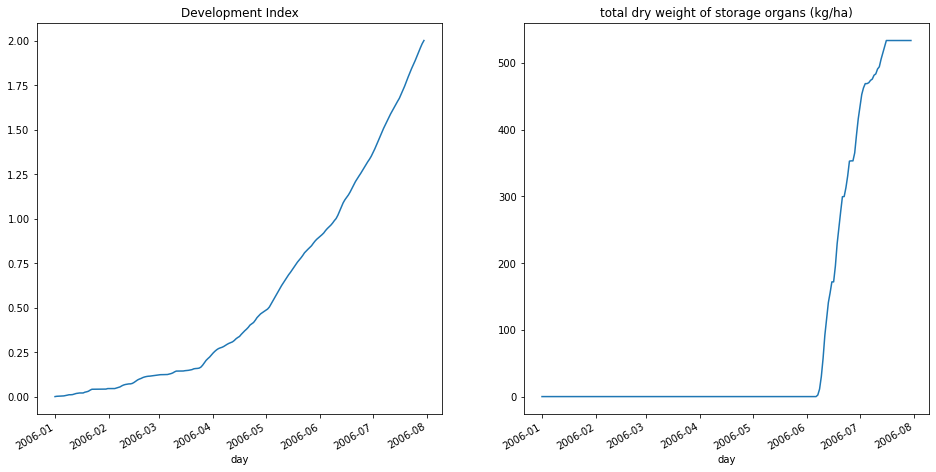

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))                      # plot grid organization
df['DVS'].plot(ax=axes[0], title="Development Index")                           # DVS plot
df['TWSO'].plot(ax=axes[1], title="Total dry weight of storage organs (kg/ha)") # TWSO plot
fig.autofmt_xdate()                                                             # rotate date labels

### Water Balance

Now, let us create two plots showing the soil moisture (SM) and total amount of water in soil (WWLOW)

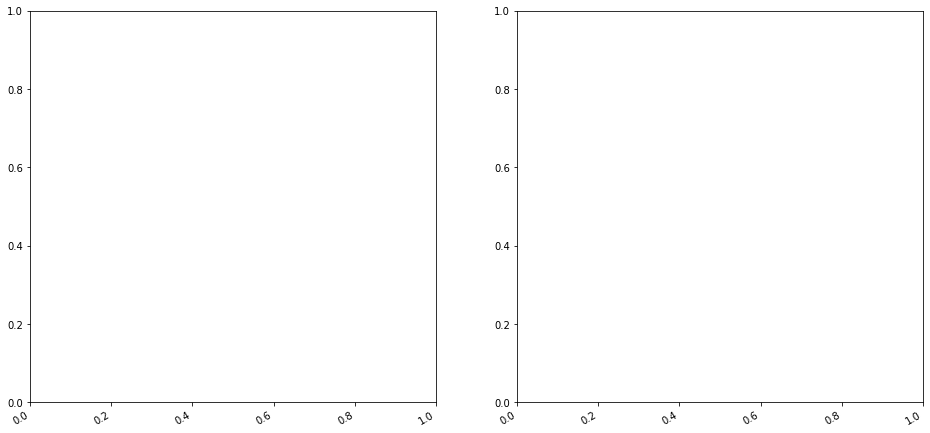

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

##### YOUR CODE HERE #####

# Plot Soil Moisture

# Plot Total Amount of Water

##########################

fig.autofmt_xdate()

### Nutrient Availability

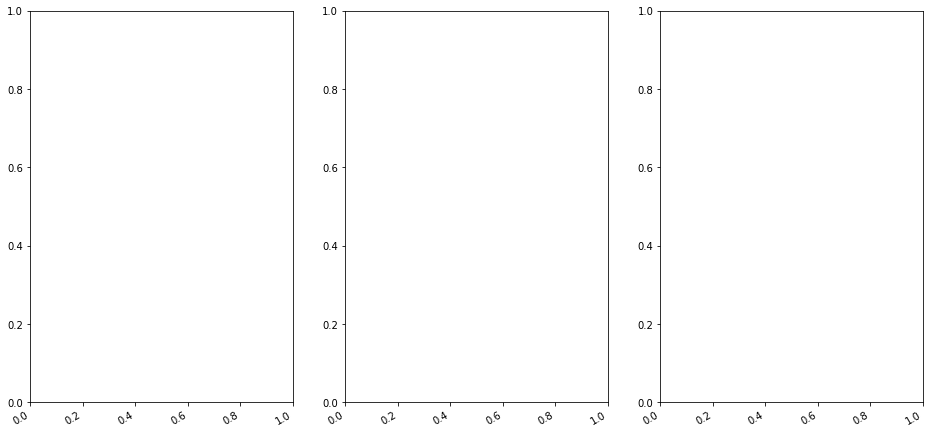

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

##### YOUR CODE HERE #####

# Plot N Availability

# Plot P Availability

# Plot K Availability
##########################

fig.autofmt_xdate()

## Agromanagement Decisions

Now that you have understanding of what the simulation is and how to extract its outputs, let us begin to understand the inputs and how they modify the simulation. First, let us understand the impact of the agromanagement actions taken, *i.e.*, **irrigation** and **fertilization**.

To modify the agromanagement actions, we need to modify the agromanagement input file. Right now, it is the file *agro.yaml*. If you open it, you will see the following:

```YAML
Version: 1.0
AgroManagement:
- 2005-10-01:
    CropCalendar:
        crop_name: wheat
        variety_name: winter-wheat
        crop_start_date: 2006-01-01
        crop_start_type: emergence
        crop_end_date: 
        crop_end_type: maturity
        max_duration: 300
    TimedEvents: null
    StateEvents: null
```

You can notice that there are no events specified, *i.e.*, no irrigation of fertilization actions. Let us try to introduce an irrigation action and see the changes it will make on the simulation.

If you open the file *agro-irrigate.yaml*, you will see the following:

```YAML
Version: 1.0
AgroManagement:
- 2005-10-01:
    CropCalendar:
        crop_name: wheat
        variety_name: winter-wheat
        crop_start_date: 2006-01-01
        crop_start_type: emergence
        crop_end_date: 
        crop_end_type: maturity
        max_duration: 300
    TimedEvents:
    -   event_signal: irrigate
        name: Irrigation application table
        comment: All irrigation amounts in cm
        events_table:
        - 2006-05-01: {amount: 10, efficiency: 0.7}
        - 2006-07-01: {amount: 15, efficiency: 0.7} 
    StateEvents: null
```

This file specifies two irrigation actions, one on May 1 and another on July 1. The irrigation amounts are specified in cm and the second irrigation is larger than the first. Let us run another simulation using *agro-irrigate.yaml* as the agromanagement input and compare the effects of the irrigation.

In [24]:
agro_file_name = "agro-irrigate.yaml"
agromanagement = yaml.load(open(os.path.join(data_dir, agro_file_name)), 
                           Loader=yaml.SafeLoader)['AgroManagement']
wofost = Engine(parameterprovider, weatherdataprovider, agromanagement, config)

wofost.run_till_terminate()
df_irrigate = pd.DataFrame(wofost.get_output())
df_irrigate = df_irrigate.set_index("day")
df_irrigate.tail()

,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,...,KDEMRT,KDEMSO,KDEMST,RNUPTAKE,RPUPTAKE,RKUPTAKE,RNFIX,NTRANSLOCATABLE,PTRANSLOCATABLE,KTRANSLOCATABLE
day,,,,,,,,,,,,,,,,,,,,,
2006-07-26,1.91155,0.038307,3163.910595,533.332056,938.398386,1692.180152,547.06118,0.008545,120.0,0.459327,...,0.0,0.145717,9.417753,0.0,0.0,0.0,0.0,17.279076,6.606809,20.654931
2006-07-27,1.93765,0.022709,3163.910595,533.332056,938.398386,1692.180152,547.06118,0.002561,120.0,0.458734,...,0.0,0.131146,9.022213,0.0,0.0,0.0,0.0,17.225646,6.598916,20.640360
2006-07-28,1.95970,0.018891,3163.910595,533.332056,938.398386,1692.180152,547.06118,0.002197,120.0,0.458459,...,0.0,0.118031,8.664937,0.0,0.0,0.0,0.0,17.177560,6.591812,20.627245
2006-07-29,1.98220,0.014169,3163.910595,533.332056,938.398386,1692.180152,547.06118,0.002066,120.0,0.458935,...,0.0,0.106228,8.314726,0.0,0.0,0.0,0.0,17.134282,6.585419,20.615442
2006-07-30,2.00000,0.007947,3163.910595,533.332056,938.398386,1692.180152,547.06118,0.001077,120.0,0.457847,...,0.0,0.095605,8.004362,0.0,0.0,0.0,0.0,17.095332,6.579665,20.604819


Let us compare the water balance in the soil with and without irrigation, plotting the two simulation outputs against each other using matplotlib.

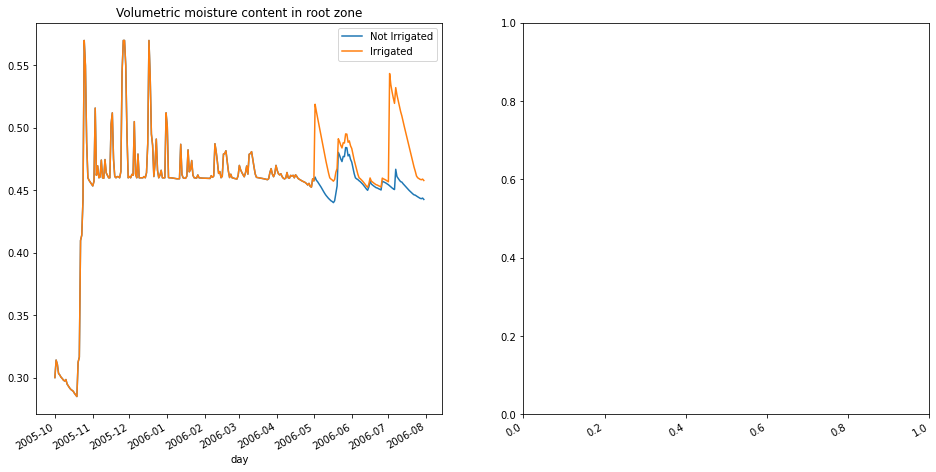

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

# Soil moisture in non irrigated simulation
df['SM'].plot(ax=axes[0], title="Volumetric moisture content in root zone", label='Not Irrigated')

# Soil moisture in irrigated simulation
df_irrigate['SM'].plot(ax=axes[0], title="Volumetric moisture content in root zone", label='Irrigated')
axes[0].legend()


##### YOUR CODE HERE #####

# Plot total amount of water

##########################

fig.autofmt_xdate()

As you can see, irrigating elevated the root zone soil moisture and the total water in the soil in the exact days in which irrigation was applied. 

However, did the irrigation affect the crop development? Let us plot and compare:

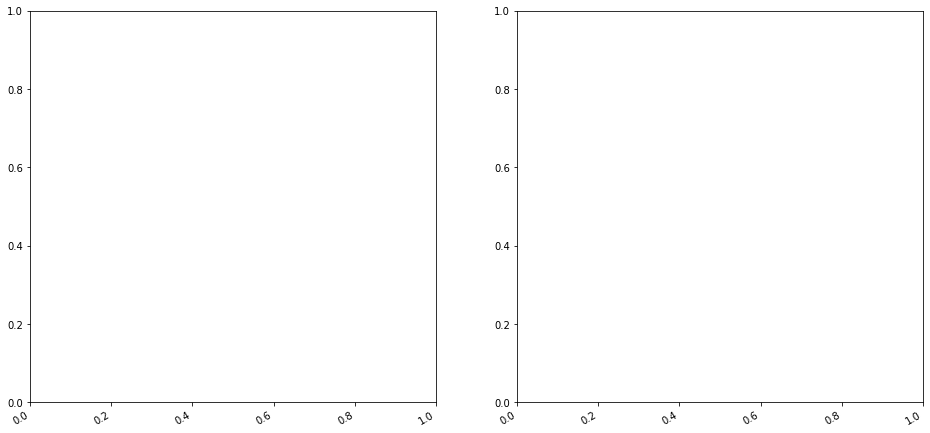

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

##### YOUR CODE HERE #####

# Plot the DVS

# Plot the TWSO

##########################

fig.autofmt_xdate()

We can see that the irrigation did not affect the crop development.

* Water availability is only a **limniting factor**
* The fact that irrigation did not affect development means that in the non irrigated crop, water availability was not a limiting factor for the crop in achieving **potential yield**

### Adding Fertilization

Now, let us try to apply fertilization in the soil and see how it affects the crop development. We need to introduce a fertilization event in the agromanager.

If ypou open the file *agro-fertilize.yaml*, you will see the following:

```YAML
Version: 1.0
AgroManagement:
- 2005-10-01:
    CropCalendar:
        crop_name: wheat
        variety_name: winter-wheat
        crop_start_date: 2006-01-01
        crop_start_type: emergence
        crop_end_date: 
        crop_end_type: maturity
        max_duration: 300
    TimedEvents:
    -   event_signal: apply_npk
        name: Timed N/P/K application table
        comment: All fertilizer amounts in kg/ha
        events_table:
        - 2006-05-15: {N_amount: 15, P_amount: 15, K_amount: 15, N_recovery: 0.7, P_recovery: 0.7, K_recovery: 0.7}
    StateEvents: null
```

Let us provide this file as input and see how it modifies the simulation results.